<a href="https://colab.research.google.com/github/seakwan121/project/blob/main/AI_07_%EB%B0%95%EC%84%B8%EA%B4%80_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 확인**

In [1]:
# 라이브러리 셋팅
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, chisquare, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mp
from scipy.stats import f_oneway
from scipy import stats

In [2]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 폰트 나눔바른고딕
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic') 

In [4]:
# 구글 드라이브에서 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

DataFile = '/content/drive/MyDrive/vgames2.csv'

df = pd.read_csv(DataFile, index_col = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df.info() # Year만 숫자형

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [7]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
df1 = df

# **1. 데이터 전처리**

# A. Sales 열에 있는 데이터들 중 문자가 들어간 데이터 수정

In [9]:
# K, M을 제거해주는 함수
# K = 1,000
# M = 1,000,000
def KM(x):
  if 'K' in x:
    return (float(x.replace('K',''))/1000)
  elif 'M' in x:
    return (float(x.replace('M','')))
  else:
    return float(x)

In [10]:
NA = df1['NA_Sales'].apply(lambda x : KM(x))
EU = df1['EU_Sales'].apply(lambda x : KM(x))
JP = df1['JP_Sales'].apply(lambda x : KM(x))
Other = df1['Other_Sales'].apply(lambda x : KM(x))


In [11]:
data = pd.concat([NA,EU,JP,Other],axis = 1)
data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,0.04,0.00,0.00,0.00
2,0.17,0.00,0.00,0.01
3,0.00,0.00,0.02,0.00
4,0.04,0.00,0.00,0.00
5,0.12,0.09,0.00,0.04
...,...,...,...,...
16594,0.15,0.04,0.00,0.01
16595,0.01,0.00,0.00,0.00
16596,0.44,0.19,0.03,0.13
16597,0.05,0.05,0.25,0.03


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16598 non-null  float64
 1   EU_Sales     16598 non-null  float64
 2   JP_Sales     16598 non-null  float64
 3   Other_Sales  16598 non-null  float64
dtypes: float64(4)
memory usage: 648.4 KB


In [13]:
df1 = df1.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis = 1)
df1

,Name,Platform,Year,Genre,Publisher
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher
...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei


In [14]:
df2 = pd.concat([df1,data], axis = 1) # df1의 Sales 데이터들 드랍 후 수정한 데이터와 합치기
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [16]:
df2.describe() ## Year의 최소값이 0년..

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,1994.242543,0.264667,0.146652,0.077782,0.048063
std,155.077168,0.816683,0.505351,0.309291,0.188588
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


# **Year 데이터 수정**

In [17]:
# 연도 수정 함수
# x가 21보다 작을 경우 +2000
# x가 21보다 크거나 같을 경우, x가 100보다 작을 경우 +1900
def year(x):
  if x < 21:
      return x + 2000
  elif x >= 21 and x < 1900:
      return x + 1900
  else:
      return x

In [18]:
df2['Year'] = df2['Year'].astype(pd.Int32Dtype())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  Int32  
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: Int32(1), float64(4), object(4)
memory usage: 1.2+ MB


In [19]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [20]:
df2 = df2.dropna(how='any')

In [21]:
df2.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [22]:
df_year = df2['Year'].apply(lambda x : year(x))

In [23]:
df_year.mean()

2006.4067483529338

In [24]:
df2['Year'] = df_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df2.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234
std,5.832087,0.822431,0.508340,0.309272,0.189678
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [26]:
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


# **1. 지역에 따라서 선호하는 게임 장르가 다를까**

In [27]:
# 총 판매량
df2['Total_Sales'] = df2['NA_Sales'] + df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [28]:
cols = df2.columns
Genre_Sales = pd.concat((df2[cols[3]], df2[cols[5:9]]), axis=1)
Genre_sum = Genre_Sales.groupby(by='Genre', axis=0).sum()
Genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


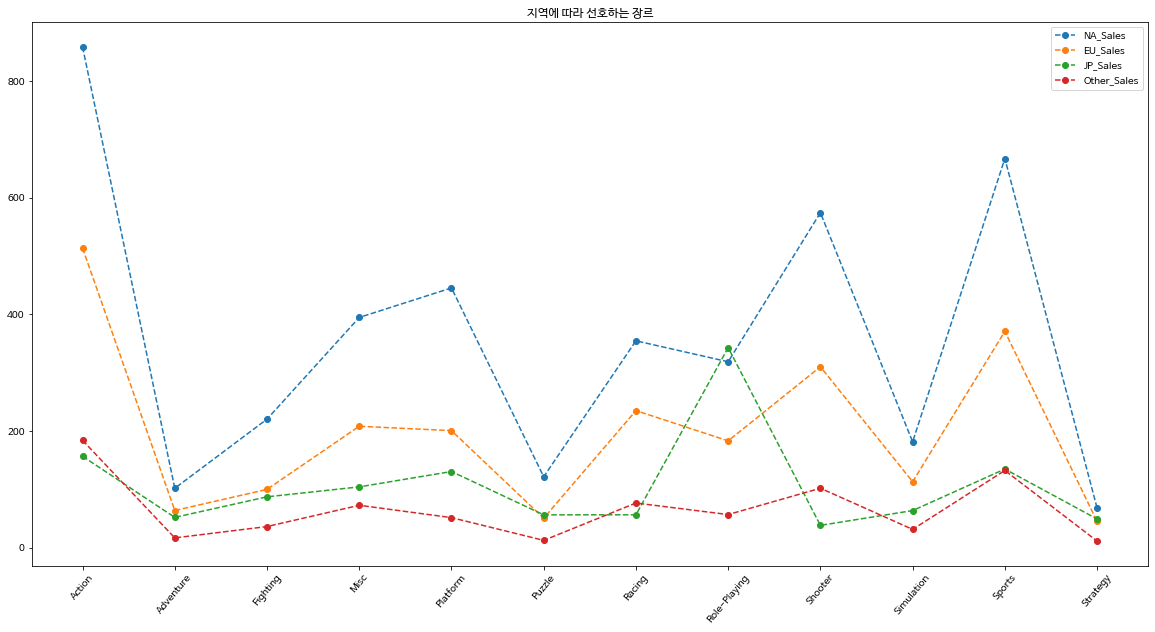

In [29]:
plt.figure(figsize=(20,10))
plt.plot(Genre_sum, 'o--')
plt.xticks(rotation=50)
plt.legend(Genre_sum.columns)
plt.title('지역에 따라 선호하는 장르')
plt.show()

# **지역에 따라 선호하는 게임 장르가 다른지 ANOVA Test**

In [30]:
Anova = pd.get_dummies(df2,columns=['Genre'])
Anova_df = df2.copy().drop('Genre',axis=1).merge(Anova)
Anova_df.head()

,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Candace Kane's Candy Factory,DS,2008,Destineer,0.04,0.00,0.00,0.00,0.04,1,0,0,0,0,0,0,0,0,0,0,0
1,The Munchables,Wii,2009,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,1,0,0,0,0,0,0,0,0,0,0,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Alchemist,0.00,0.00,0.02,0.00,0.02,0,1,0,0,0,0,0,0,0,0,0,0
3,Deal or No Deal: Special Edition,DS,2010,Zoo Games,0.04,0.00,0.00,0.00,0.04,0,0,0,1,0,0,0,0,0,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,D3Publisher,0.12,0.09,0.00,0.04,0.25,0,0,0,0,1,0,0,0,0,0,0,0


NA 장르별 ANOVA

In [31]:
for i in Anova_df.columns[9:]:
  print(stats.f_oneway(Anova_df['NA_Sales'],Anova_df[i]))

F_onewayResult(statistic=83.84766222377884, pvalue=5.647941494163043e-20)
F_onewayResult(statistic=759.8724207232699, pvalue=2.3034413459321766e-165)
F_onewayResult(statistic=1023.5752692051371, pvalue=3.689926054703597e-221)
F_onewayResult(statistic=552.0229207703103, pvalue=4.686277343423697e-121)
F_onewayResult(statistic=998.409901753322, pvalue=7.445263742040084e-216)
F_onewayResult(statistic=1213.6551098447342, pvalue=4.266821016064027e-261)
F_onewayResult(statistic=787.2615678575052, pvalue=3.5136846018491617e-171)
F_onewayResult(statistic=655.7108718058263, pvalue=3.385721930018278e-143)
F_onewayResult(statistic=753.256327196059, pvalue=5.863966684233245e-164)
F_onewayResult(statistic=1016.2488516128521, pvalue=1.291227359479216e-219)
F_onewayResult(statistic=311.15309591077016, pvalue=2.580374141433668e-69)
F_onewayResult(statistic=1138.350178599457, pvalue=2.6569987572701106e-245)


EU 장르별 ANOVA

In [32]:
for i in Anova_df.columns[9:]:
  print(stats.f_oneway( Anova_df['EU_Sales'],Anova_df[i]))

F_onewayResult(statistic=105.50490676855425, pvalue=1.0327886313704259e-24)
F_onewayResult(statistic=236.1035667545891, pvalue=4.27902550452932e-53)
F_onewayResult(statistic=486.9047896159822, pvalue=4.122772159122541e-107)
F_onewayResult(statistic=89.01865571466347, pvalue=4.162244603537815e-21)
F_onewayResult(statistic=460.3138575399851, pvalue=2.0812292116688357e-101)
F_onewayResult(statistic=704.1784520949559, pvalue=1.605951897504436e-153)
F_onewayResult(statistic=259.11178632257224, pvalue=4.4987652694136366e-58)
F_onewayResult(statistic=155.92766150591945, pvalue=1.0605404436564757e-35)
F_onewayResult(statistic=230.6611410875443, pvalue=6.452185254927106e-52)
F_onewayResult(statistic=479.10904146702734, pvalue=1.9348562202673495e-105)
F_onewayResult(statistic=1.4493914283626255, pvalue=0.22863440172023414)
F_onewayResult(statistic=614.7071556666831, pvalue=1.889791582509396e-134)


JP 장르별 ANOVA

In [33]:
for i in Anova_df.columns[9:]:
  print(stats.f_oneway( Anova_df['JP_Sales'],Anova_df[i]))

F_onewayResult(statistic=934.4603381346601, pvalue=2.349821940085524e-202)
F_onewayResult(statistic=0.004221138120379373, pvalue=0.9481980580924716)
F_onewayResult(statistic=81.19019936330346, pvalue=2.1592574348442616e-19)
F_onewayResult(statistic=54.820479294445924, pvalue=1.3525742670515758e-13)
F_onewayResult(statistic=66.69905906520755, pvalue=3.2762227580373204e-16)
F_onewayResult(statistic=236.96910064816973, pvalue=2.779541476238874e-53)
F_onewayResult(statistic=1.0237593192880299, pvalue=0.31163648199515726)
F_onewayResult(statistic=12.986835346770325, pvalue=0.0003141574010990022)
F_onewayResult(statistic=0.027128478903340962, pvalue=0.8691754335308833)
F_onewayResult(statistic=76.82567505013276, pvalue=1.956285781143877e-18)
F_onewayResult(statistic=299.3890615578202, pvalue=8.926099921234098e-67)
F_onewayResult(statistic=165.32433973906984, pvalue=9.60760094178929e-38)


Other 장르별 ANOVA

In [34]:
for i in Anova_df.columns[9:]:
  print(stats.f_oneway( Anova_df['Other_Sales'],Anova_df[i]))

F_onewayResult(statistic=1898.9370318902247, pvalue=0.0)
F_onewayResult(statistic=133.94989996683887, pvalue=6.443741853406294e-31)
F_onewayResult(statistic=1.93664070504875, pvalue=0.1640432759351681)
F_onewayResult(statistic=385.2599645860792, pvalue=2.783726956973064e-85)
F_onewayResult(statistic=5.695769881512349, pvalue=0.01701153999865713)
F_onewayResult(statistic=41.7908672282302, pvalue=1.0301581704796813e-10)
F_onewayResult(statistic=110.85615828937232, pvalue=7.00392578584929e-26)
F_onewayResult(statistic=242.33664597117112, pvalue=1.915023809849025e-54)
F_onewayResult(statistic=139.8584785094711, pvalue=3.328819654810112e-32)
F_onewayResult(statistic=2.8294956314852246, pvalue=0.09255703323347106)
F_onewayResult(statistic=898.0195329972353, pvalue=1.1894352529753112e-194)
F_onewayResult(statistic=10.671017865908114, pvalue=0.0010894004689567262)


Total 장르별 ANOVA

In [35]:
for i in Anova_df.columns[9:]:
  print(stats.f_oneway( Anova_df['Total_Sales'],Anova_df[i]))

F_onewayResult(statistic=718.8606047607241, pvalue=1.206467569291026e-156)
F_onewayResult(statistic=1370.9697956629147, pvalue=5.640866705947102e-294)
F_onewayResult(statistic=1548.397059520919, pvalue=0.0)
F_onewayResult(statistic=1213.8624675577742, pvalue=3.8606781245444485e-261)
F_onewayResult(statistic=1532.2889096255449, pvalue=0.0)
F_onewayResult(statistic=1665.464504721674, pvalue=0.0)
F_onewayResult(statistic=1390.3837878979746, pvalue=5.06549973035172e-298)
F_onewayResult(statistic=1294.5881032204331, pvalue=4.961369846178897e-278)
F_onewayResult(statistic=1366.24075617141, pvalue=5.463134712201924e-293)
F_onewayResult(statistic=1543.7233682124818, pvalue=0.0)
F_onewayResult(statistic=999.731917799965, pvalue=3.918289005384853e-216)
F_onewayResult(statistic=1620.0050968187936, pvalue=0.0)


# **2. 연도별 게임의 트렌드가 있을까?**

연도별 가장 많이 출시한 장르

In [36]:
year_max_df = df2.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['년도', '장르', '출시량']
year_max_genre

,년도,장르,출시량
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Shooter,3
5,1985,Puzzle,4
6,1986,Platform,6
7,1987,Sports,4
8,1988,Platform,4
9,1989,Puzzle,5


In [37]:
genre = year_max_genre['장르'].values
genre

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Role-Playing', 'Simulation'], dtype=object)

In [38]:
year_max_sales = df2.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
condition = year_max_sales['Total_Sales'] == year_max_sales.groupby(['Year'])['Total_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales['Genre']

3           Shooter
4            Action
14           Puzzle
21         Platform
30          Shooter
34         Platform
39           Action
47         Fighting
53         Platform
63           Puzzle
68         Platform
78         Platform
88         Fighting
102        Platform
114        Platform
126        Platform
141    Role-Playing
152          Racing
168          Sports
177    Role-Playing
192          Sports
194          Action
206          Action
218          Action
230          Action
242          Action
264          Sports
266          Action
278          Action
300          Sports
302          Action
314          Action
326          Action
338          Action
350          Action
362          Action
374          Action
386    Role-Playing
387      Simulation
Name: Genre, dtype: object

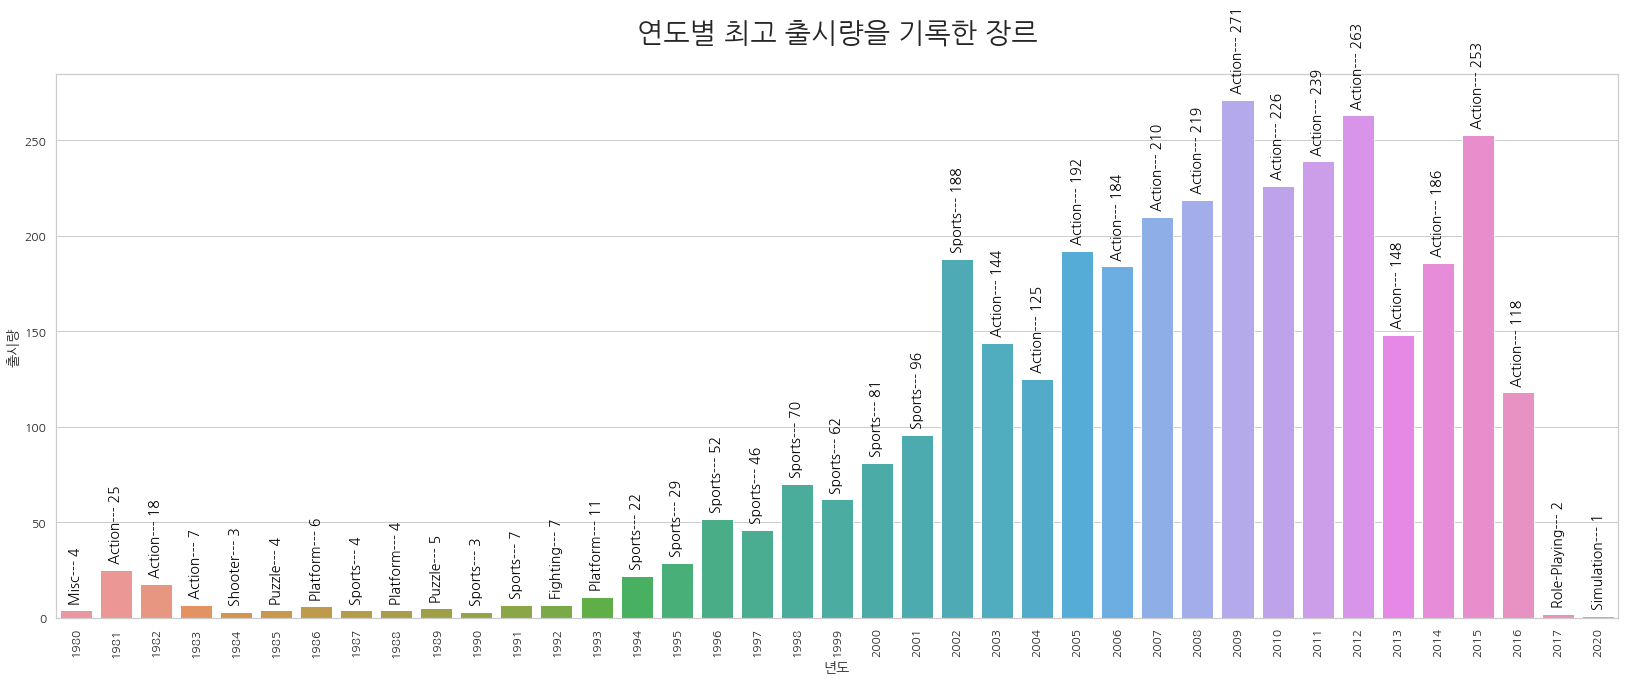

In [39]:
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_genre)
idx = 0
for value in year_max_genre['출시량']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('연도별 최고 출시량을 기록한 장르', fontsize=28, y=1.05)
plt.show()

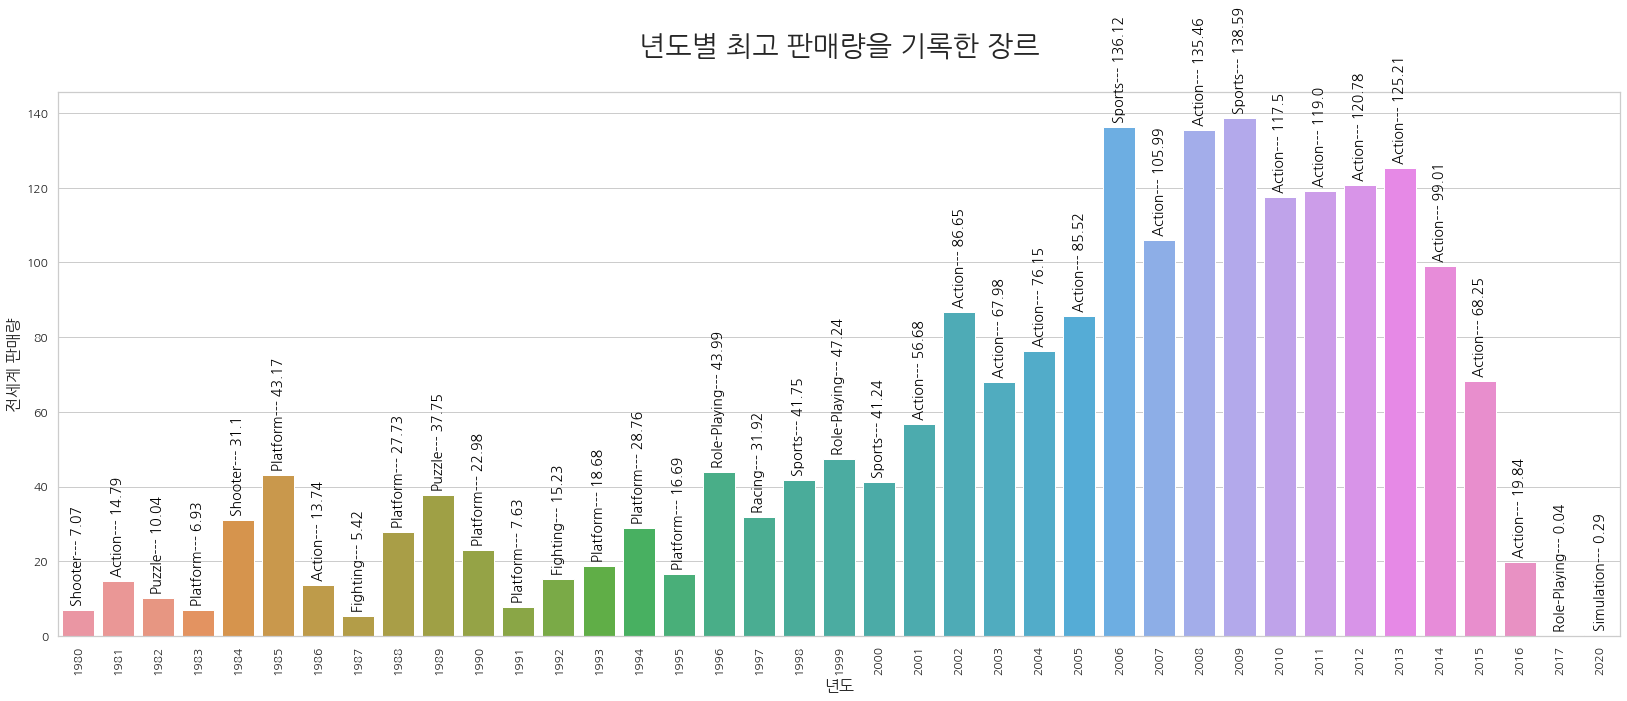

In [40]:
year_max_sales = df2.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
condition = year_max_sales['Total_Sales'] == year_max_sales.groupby(['Year'])['Total_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']

genre = year_max_sales['장르'].values

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x=idx, y=value + 2, s=str(genre[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('년도별 최고 판매량을 기록한 장르', y=1.06, fontsize=28)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=16)
plt.ylabel('전세계 판매량', fontsize=16)
plt.show()

# **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

**역대 판매량 TOP10 게임**

In [41]:
Sales_top10 = df2.loc[df2.Total_Sales.sort_values(ascending = False).index].reset_index(drop = True).head(10)
rank = [str(x) + '위' for x in range(1, 11)]
Sales_top10['rank'] = rank
Sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1위
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2위
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3위
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4위
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5위
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6위
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7위
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8위
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9위
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10위


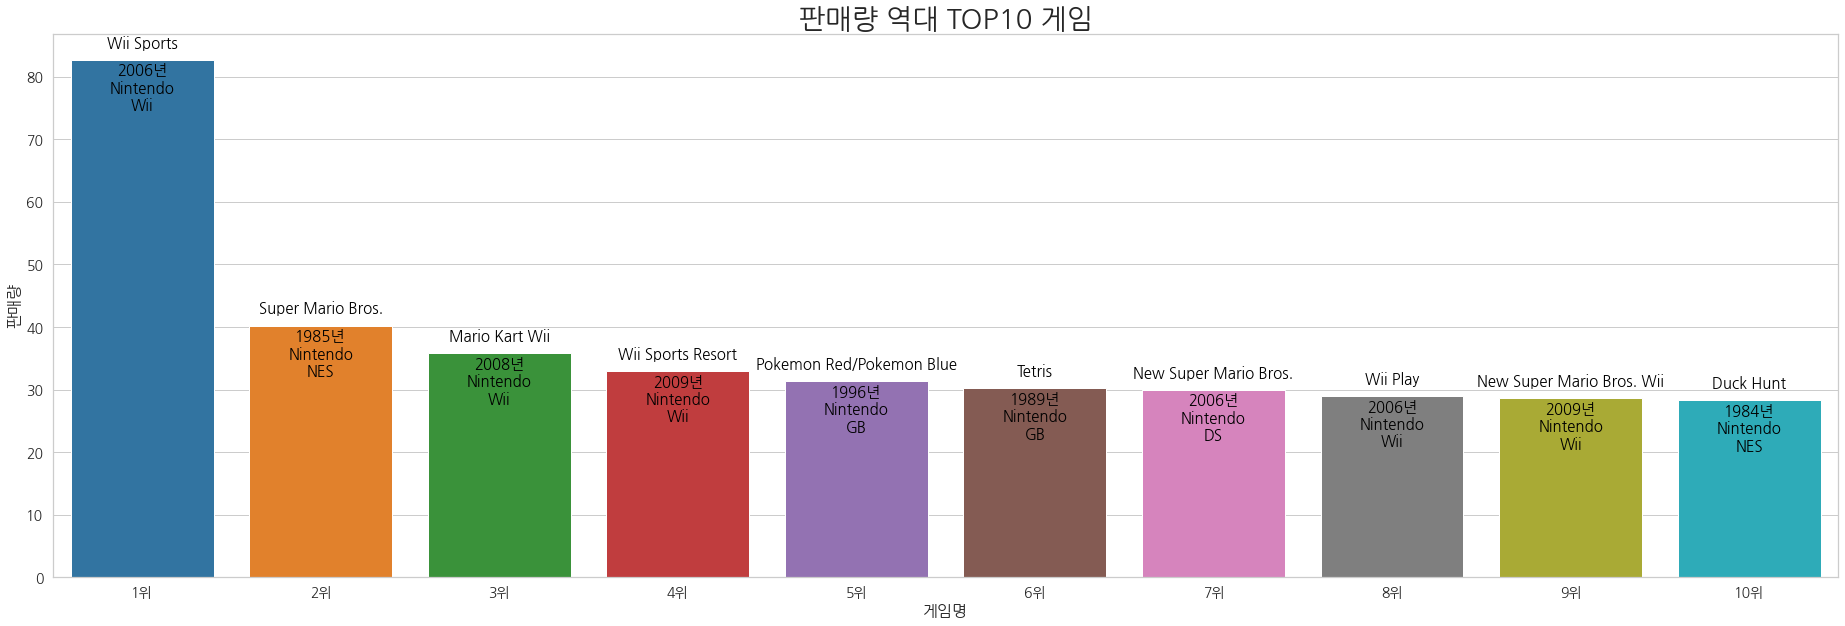

In [42]:
plt.figure(figsize=(32,10))
a = sns.barplot(x='rank', y='Total_Sales', data=Sales_top10)
i = 0
for name, year, val, platform, publisher in zip(Sales_top10.Name, Sales_top10.Year, Sales_top10.Total_Sales, Sales_top10.Platform, Sales_top10.Publisher):
  a.text(x=i, y=val+2, s=(name), color='black', ha='center', fontsize=15)
  a.text(x=i, y=val-8, s=(str(year) + '년' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=15)
  i+=1
a.set_title('판매량 역대 TOP10 게임', fontsize=28)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('게임명', fontsize=16)
plt.ylabel('판매량', fontsize=16)
plt.show()

In [43]:
Top_Sale=df2[['Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Top_Sale['Total_Sales']=df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
Top_Sale=Top_Sale.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Top_Sale[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1204,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10489,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


**장르별 출고량**

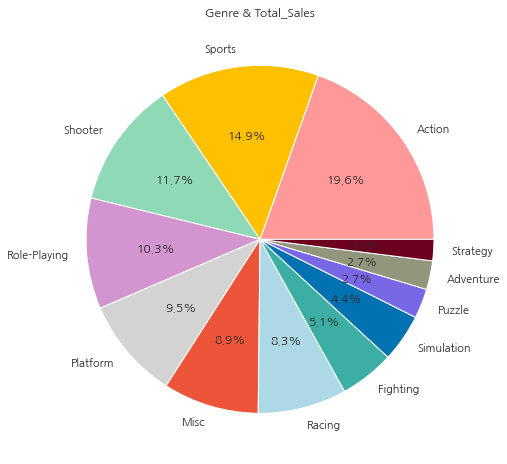

In [44]:
Top_Sale_Genre=Top_Sale.groupby(['Genre']).sum()
Top_Sale_Genre=Top_Sale_Genre.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Genre=Top_Sale_Genre.index

plt.figure(figsize=(8, 8))
plt.title('Genre & Total_Sales')
plt.pie(Top_Sale_Genre['Total_Sales'], labels=Genre, autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#0072B2','#7868E6','#92967D','#6B011F'])

plt.show()

플랫폼별 출고량

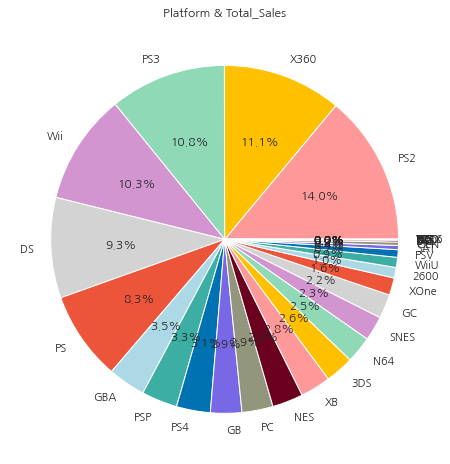

In [45]:
Top_Sale_Platform=Top_Sale.groupby(['Platform']).sum()
Top_Sale_Platform=Top_Sale_Platform.sort_values(by=['Total_Sales'], axis=0, ascending=False)
Platform=Top_Sale_Platform.index

plt.figure(figsize=(8, 8))
plt.title('Platform & Total_Sales')
plt.pie(Top_Sale_Platform['Total_Sales'], labels=Platform, autopct='%.1f%%',colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','lightgray','#ED553B','lightblue','#3CAEA3','#0072B2','#7868E6','#92967D','#6B011F'])

plt.show()